In [6]:
#we will use matplotlib-image read read only our image 
from matplotlib import image as img_reader 
#image saving and demonstration
from PIL import Image 
import numpy as np

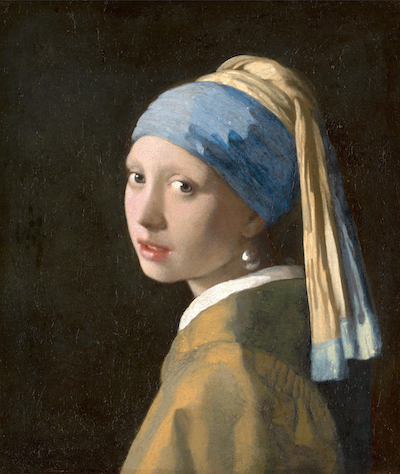

In [7]:
display(Image.open("1665_girl_with_a_pearl_earring_sm.jpg"))

# Floyd Steinberg Matrix
 [0 0 0]</br>
 [0 0 7] * 1/16</br>
 [3 5 1]</br>

In [46]:
def floy_steinberg(source):
    #image reading from source
    image = img_reader.imread(source).astype('float64')
    #Image with rounded pixels
    rounded_pixels = np.round(image)#find closest color
    #image dimention
    height , width = image.shape[0] , image.shape[1]
    #floy_steinberg matrix  variables
    cell_2_3 = 7 / 16
    cell_3_1 = 3 / 16
    cell_3_2 = 5 / 16
    cell_3_3 = 1 / 16
    for i in range(height):
        for j in range(width):
            error = image[i, j] - rounded_pixels[i, j]
            image[i, j] = rounded_pixels[i, j]
            
            if j + 1 < width:
                image[i, j + 1] += error * cell_2_3 
            if (j - 1 >= 0) and (i + 1 < height): 
                image[i + 1, j - 1] += error * cell_3_1
            if (i + 1 < height) and (j + 1 < width):
                image[i + 1, j + 1] += error * cell_3_3
            if i + 1 < height:
                image[i + 1, j] += error * cell_3_2
            
    return image

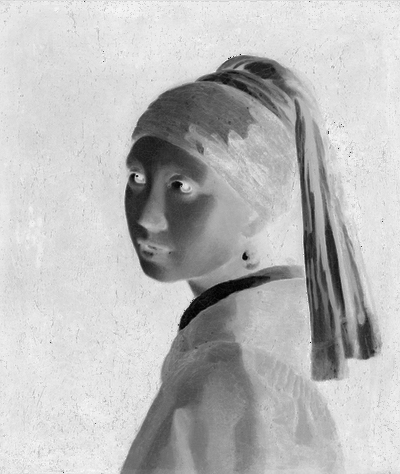

In [47]:
fs_dithered_image = floy_steinberg("1665_girl_with_a_pearl_earring_sm.jpg")
img_saver.fromarray((fs_dithered_image * 255).astype(np.uint8)).convert('L').save("FS-dithered.png")
display(Image.open("FS-dithered.png"))